In [20]:
import earthaccess
import xarray as xr

auth = earthaccess.login()

In [2]:
tspan = ("2024-04-01", "2024-04-16")
bbox = (-76.75, 36.97, -75.74, 39.01)

results = earthaccess.search_data(
    short_name="PACE_OCI_L1B_SCI",
    temporal=tspan,
    bounding_box=bbox,
)

Granules found: 7


In [29]:
io_params ={
    "fsspec_params": {
        # "skip_instance_cache": True
        "cache_type": "first",  # or "first" with enough space
        "block_size": 16*1024*1024 # could be bigger
    },
    "h5py_params" : {
        "driver_kwds": { # only recent versions of xarray and h5netcdf allow this correctly
            # "page_buf_size": 32*1024*1024, # this one only works in repacked files
            "rdcc_nbytes": 32*1024*1024 # this one is to read the chunks 
        }

    }
}

fo_list = earthaccess.open(results, fsspec_opts=io_params["fsspec_params"])
# fo_list = earthaccess.open(results, smart_open=False)

Opening 7 granules, approx size: 11.94 GB


QUEUEING TASKS | :   0%|          | 0/7 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/7 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/7 [00:00<?, ?it/s]

In [21]:
results[0]

Collection: {'Version': 'V1.0', 'ShortName': 'PACE_OCI_L1B_SCI'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': 52.6548, 'Longitude': -48.74802}, {'Latitude': 46.3365, 'Longitude': -85.31503}, {'Latitude': 29.44497, 'Longitude': -75.76823}, {'Latitude': 34.88025, 'Longitude': -47.84247}, {'Latitude': 52.6548, 'Longitude': -48.74802}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2024-04-11T16:46:52Z', 'EndingDateTime': '2024-04-11T16:51:51Z'}}
Size(MB): 1714.3196392059326
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240411T164652.L1B.nc']

In [31]:
fo_list[0]

File: <File-like object HTTPFileSystem, https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240411T164652.L1B.nc>
        Cache:<FirstChunkCache:
            block size  :   16777216
            block count :   0
            file size   :   1797594430
            cache hits  :   0
            cache misses:   0
            total requested bytes: 0>
        

In [32]:
%%time
ds = xr.open_dataset(fo_list[0],
                     group="observation_data",
                     engine="h5netcdf",
                     **io_params["h5py_params"])
ds

CPU times: user 118 ms, sys: 23 ms, total: 141 ms
Wall time: 3.25 s


<xarray.Dataset> Size: 5GB
Dimensions:    (blue_bands: 119, number_of_scans: 1709, ccd_pixels: 1272,
                red_bands: 163, SWIR_bands: 9, SWIR_pixels: 1272)
Dimensions without coordinates: blue_bands, number_of_scans, ccd_pixels,
                                red_bands, SWIR_bands, SWIR_pixels
Data variables:
    rhot_blue  (blue_bands, number_of_scans, ccd_pixels) float32 1GB ...
    qual_blue  (blue_bands, number_of_scans, ccd_pixels) float32 1GB ...
    rhot_red   (red_bands, number_of_scans, ccd_pixels) float32 1GB ...
    qual_red   (red_bands, number_of_scans, ccd_pixels) float32 1GB ...
    rhot_SWIR  (SWIR_bands, number_of_scans, SWIR_pixels) float32 78MB ...
    qual_SWIR  (SWIR_bands, number_of_scans, SWIR_pixels) float32 78MB ...

In [33]:
ds.rhot_blue.chunk()

<xarray.DataArray 'rhot_blue' (blue_bands: 119, number_of_scans: 1709,
                               ccd_pixels: 1272)> Size: 1GB
dask.array<xarray-<this-array>, shape=(119, 1709, 1272), dtype=float32, chunksize=(119, 1709, 1272), chunktype=numpy.ndarray>
Dimensions without coordinates: blue_bands, number_of_scans, ccd_pixels
Attributes:
    long_name:    Top of Atmosphere Blue Band Reflectance
    valid_min:    0.0
    valid_max:    1.3
    units:        dimensionless
    description:  rhot = Lt * Pi * earth_sun_distance_correction/(solar_irrad...

CPU times: user 3.43 s, sys: 724 ms, total: 4.16 s
Wall time: 3min 45s


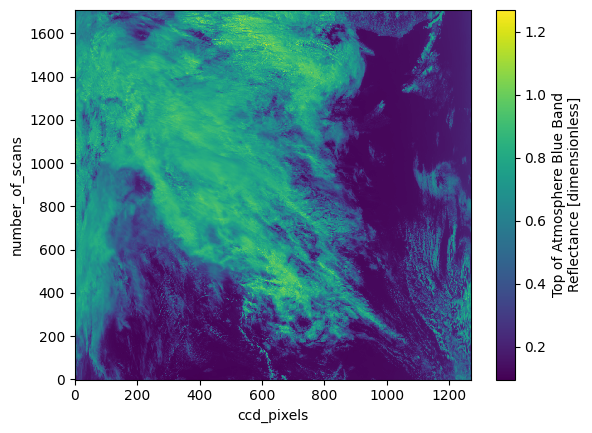

In [34]:
%%time
ds["rhot_blue"].sel({"blue_bands": 70}).plot()

In [ ]:
fo_list[0]

In [ ]:
ds["rhot_red"].sel({"red_bands": 10}).plot()